### **Price prediction model (Time Series) using FBProphet**

Build a time series forecasting model for avocado prices using Facebook Prophet.

**Dataset**

Date: The date of the observation

AveragePrice: the average price of a single avocado

type: conventional or organic

year: the year

Region: the city or region of the observation

Total Volume: Total number of avocados sold

4046: Total number of avocados with PLU (Product Lookup code) 4046 sold

4225: Total number of avocados with PLU (Product Lookup code) 4225 sold

4770: Total number of avocados with PLU (Product Lookup code) 4770 sold

Dataset link: [avocado_prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries and packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

In [ ]:
# Import the dataset
avocado_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Price_prediction_fbprophet/avocado.csv')

In [ ]:
# Visualise first 5 rows
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# See basic statistics overview
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Check basic structure
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
# Double check if there are null values
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Explore the dataset**

In [ ]:
# Sort the dataset by the date
avocado_df=avocado_df.sort_values('Date')

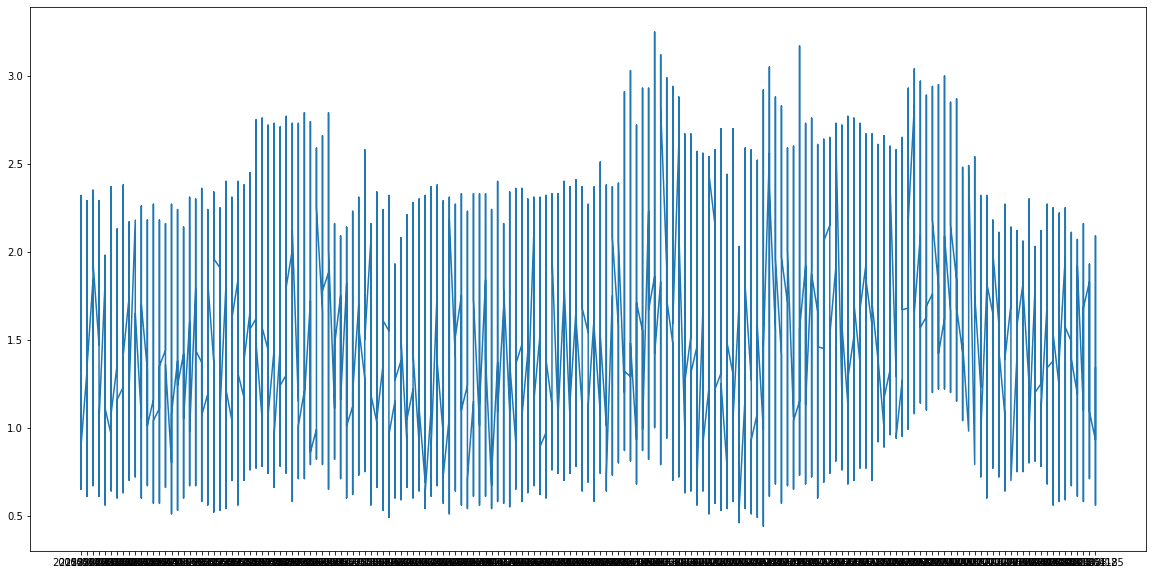

In [ ]:
# Plot date and average price
plt.figure(figsize=(20,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

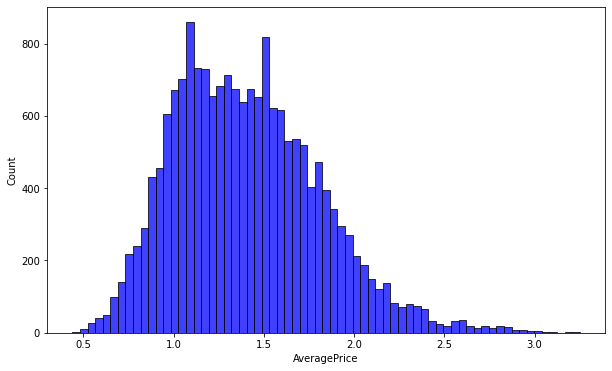

In [ ]:
# Plot the distribution of the average price.
plt.figure(figsize=(10,6))
sns.histplot(avocado_df['AveragePrice'], color='b')

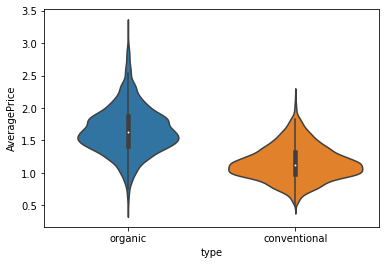

In [ ]:
# Plot the violin plot of the average price vs avocado type.
sns.violinplot(y='AveragePrice', x='type', data=avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

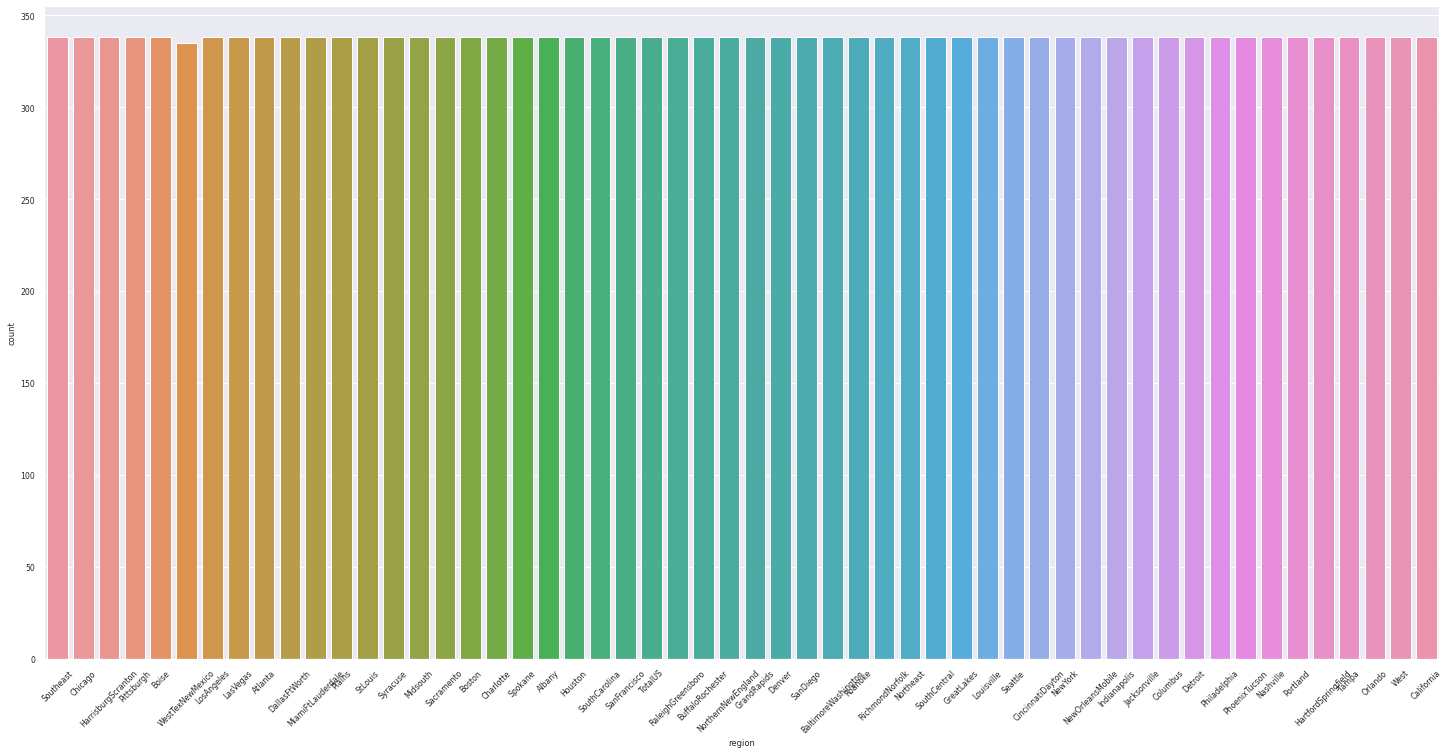

In [ ]:
# Plot a bar chart to show the number of regions.

sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x='region', data=avocado_df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

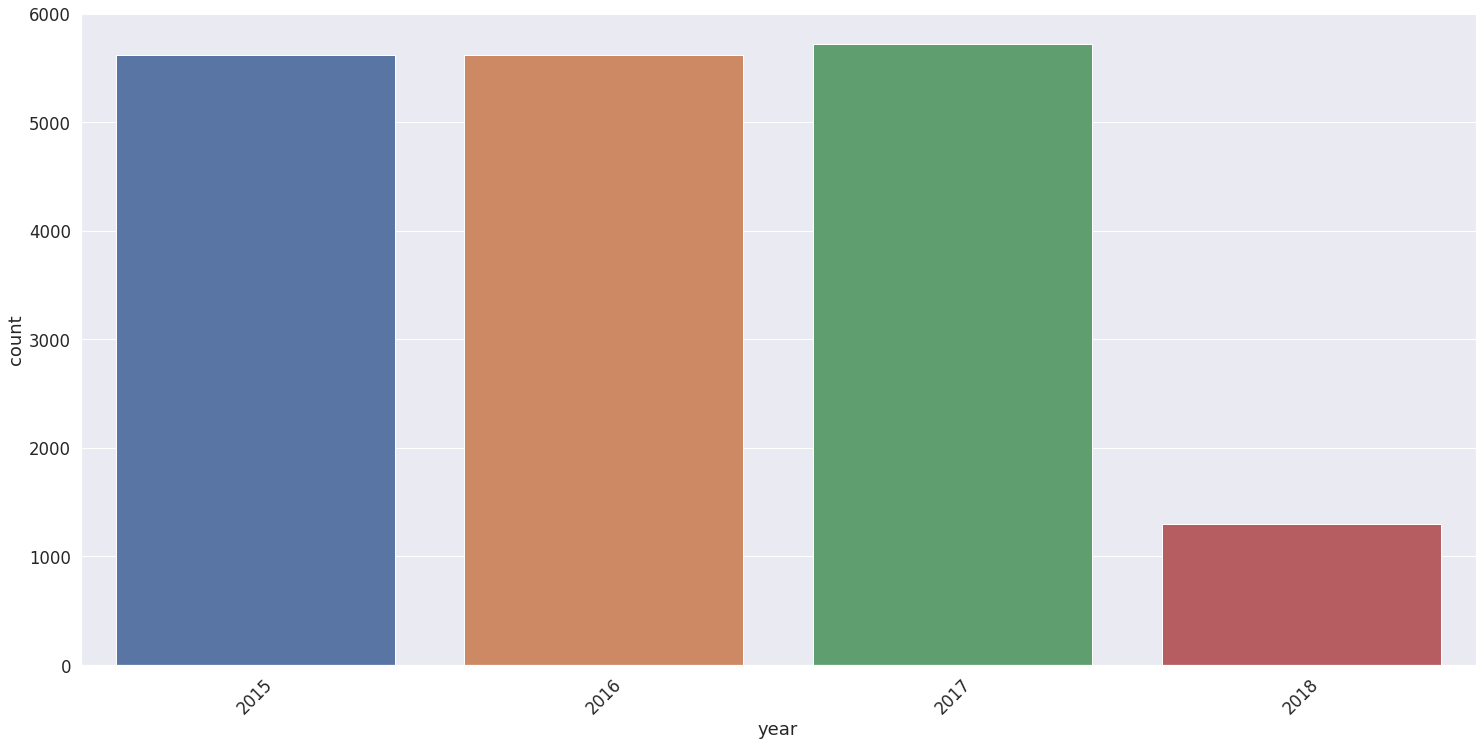

In [ ]:
# Plot a bar chart to indicate the count of avocados per year.

sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x='year', data=avocado_df)
plt.xticks(rotation=45)

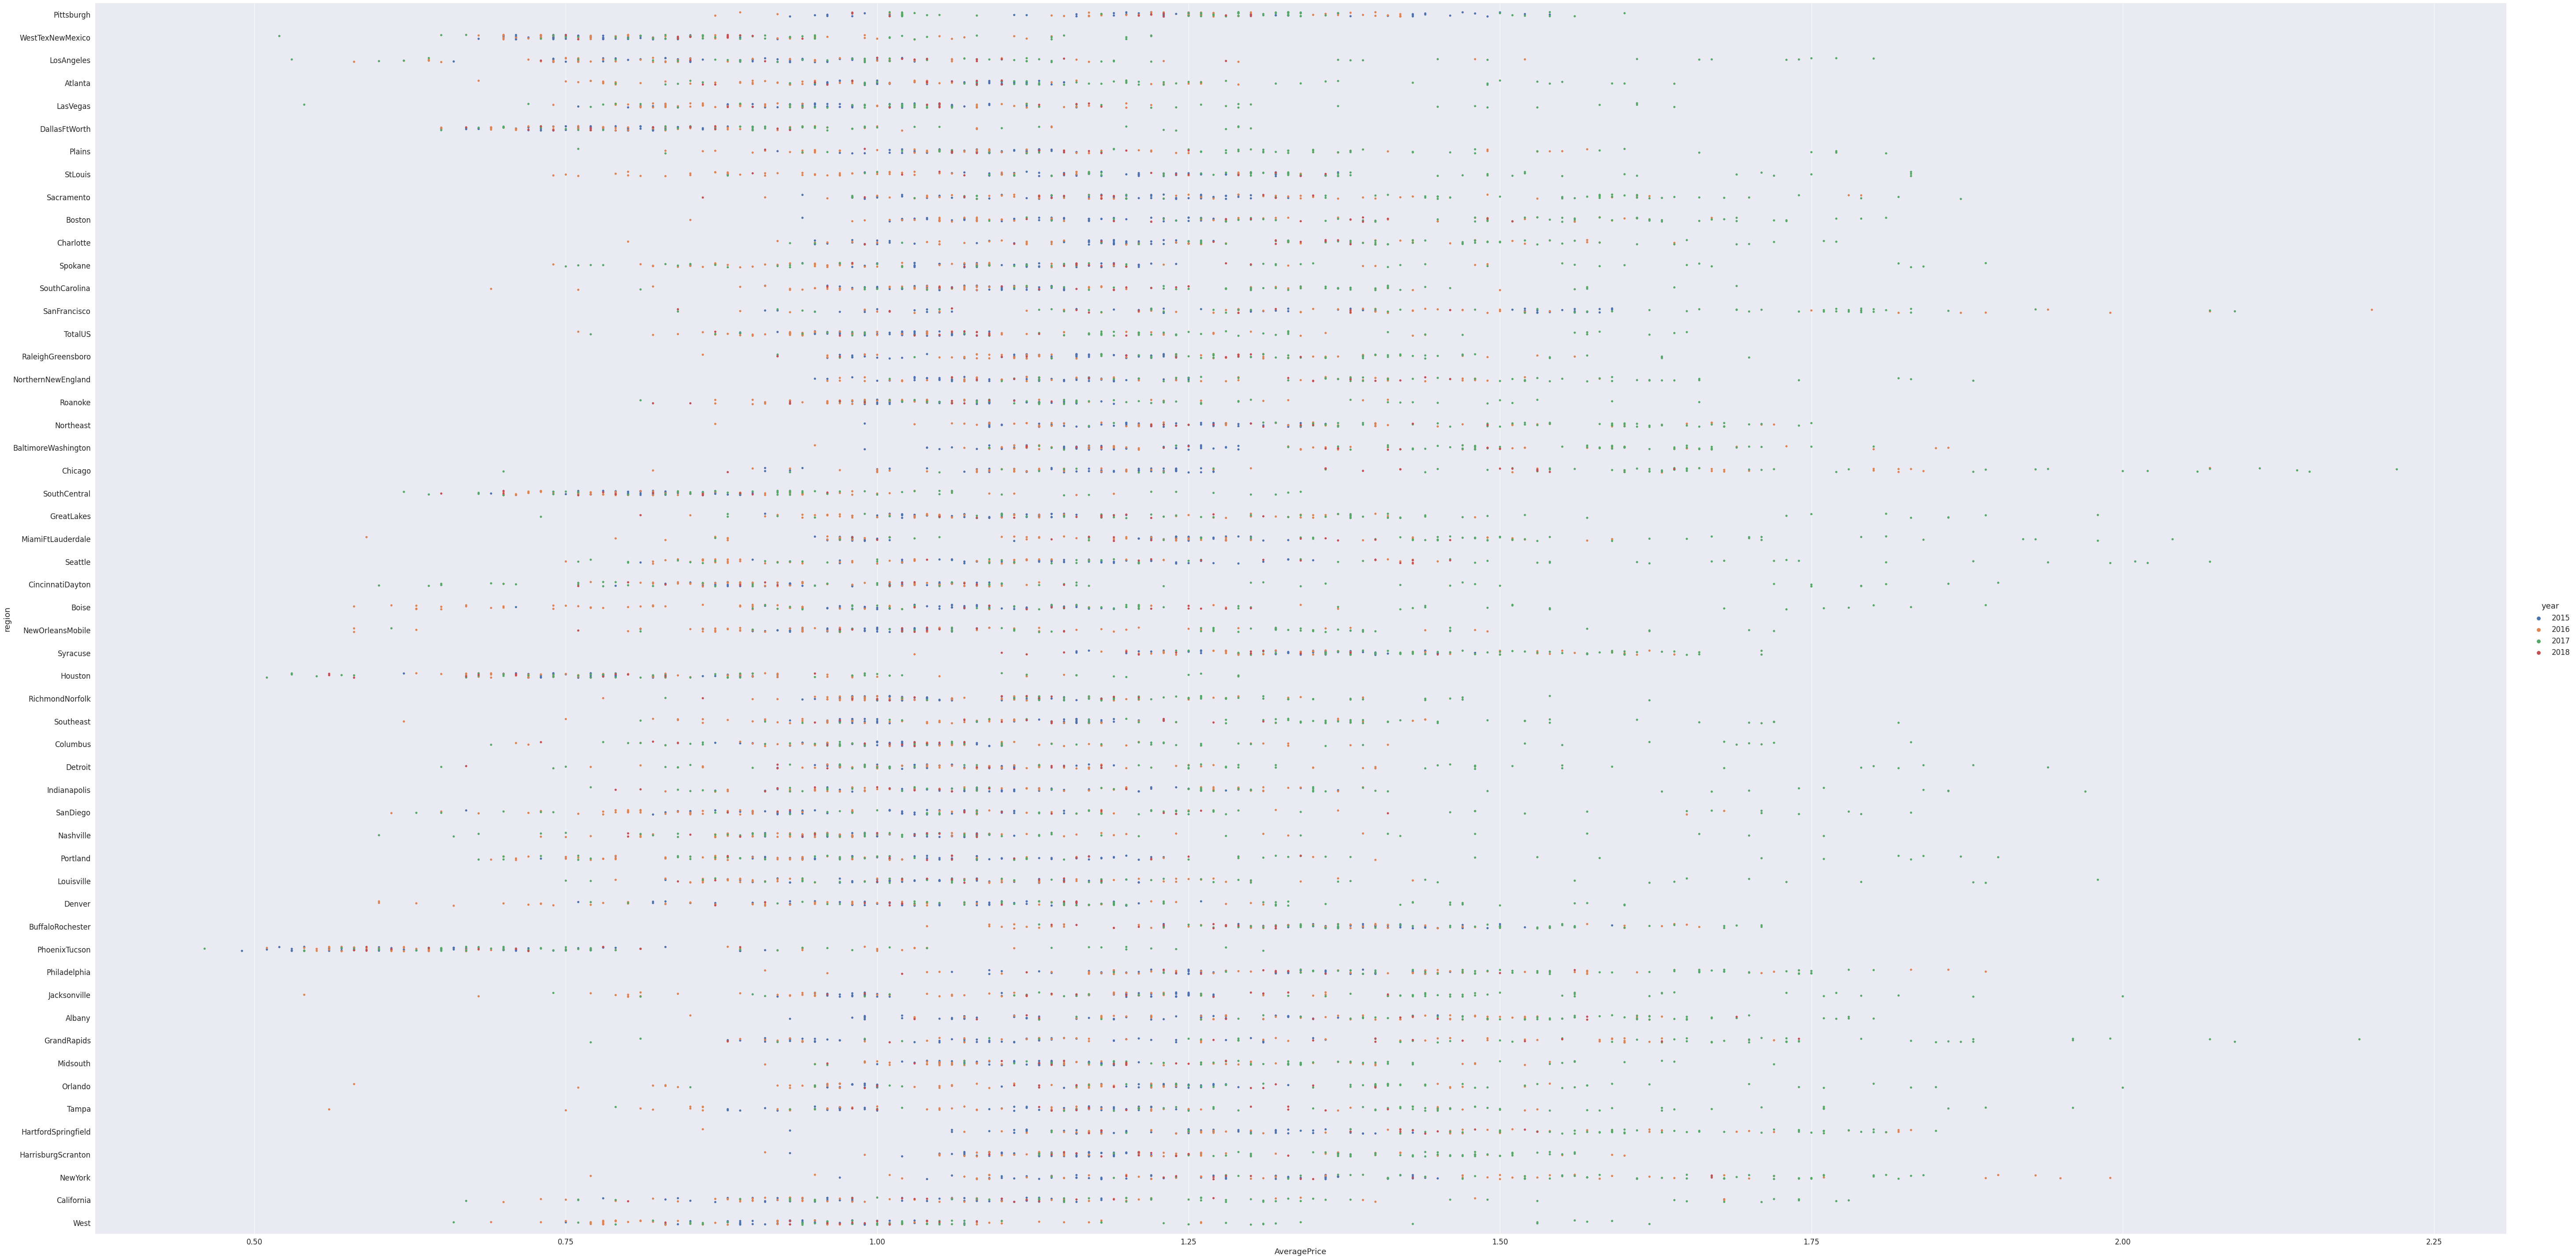

In [ ]:
from IPython.core.pylabtools import figsize
# Plot the avocado prices vs the regions for conventional avocados.


conventional=sns.catplot(x='AveragePrice', y='region', data=avocado_df[avocado_df['type']=='conventional'],hue='year',
height=40,
aspect=2)


**Prepare dataframe for Prophet**

In [ ]:
avocado_prophet_df=avocado_df[['Date', 'AveragePrice']]

In [ ]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [ ]:
# Rename columns
avocado_prophet_df=avocado_prophet_df.rename(columns={'Date': 'ds', 'AveragePrice':'y'})

In [ ]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


**Develop Prediction model**

In [ ]:
m=Prophet()
m.fit(avocado_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Making the forecast
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498608,0.926491,1.856608,1.498608,1.498608,-0.113270,-0.113270,-0.113270,-0.113270,-0.113270,-0.113270,0.0,0.0,0.0,1.385337
1,2015-01-11,1.493471,0.896338,1.874640,1.493471,1.493471,-0.104849,-0.104849,-0.104849,-0.104849,-0.104849,-0.104849,0.0,0.0,0.0,1.388621
2,2015-01-18,1.488334,0.869860,1.842415,1.488334,1.488334,-0.104524,-0.104524,-0.104524,-0.104524,-0.104524,-0.104524,0.0,0.0,0.0,1.383810
3,2015-01-25,1.483198,0.864196,1.841426,1.483198,1.483198,-0.123469,-0.123469,-0.123469,-0.123469,-0.123469,-0.123469,0.0,0.0,0.0,1.359729
4,2015-02-01,1.478061,0.897856,1.809334,1.478061,1.478061,-0.151828,-0.151828,-0.151828,-0.151828,-0.151828,-0.151828,0.0,0.0,0.0,1.326232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161728,0.546860,1.600863,0.968463,1.344020,-0.086221,-0.086221,-0.086221,-0.086221,-0.086221,-0.086221,0.0,0.0,0.0,1.075508
530,2019-03-22,1.160997,0.517512,1.591932,0.966661,1.344179,-0.084549,-0.084549,-0.084549,-0.084549,-0.084549,-0.084549,0.0,0.0,0.0,1.076448
531,2019-03-23,1.160266,0.527527,1.623277,0.965103,1.343598,-0.082604,-0.082604,-0.082604,-0.082604,-0.082604,-0.082604,0.0,0.0,0.0,1.077662
532,2019-03-24,1.159535,0.558296,1.592940,0.963756,1.343735,-0.080406,-0.080406,-0.080406,-0.080406,-0.080406,-0.080406,0.0,0.0,0.0,1.079129


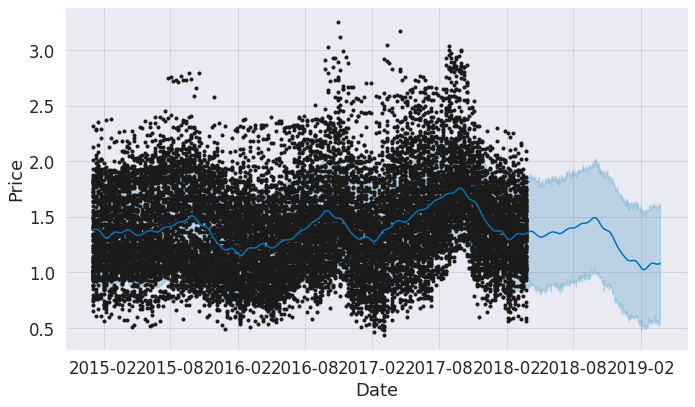

In [ ]:
figure=m.plot(forecast, xlabel='Date', ylabel='Price')

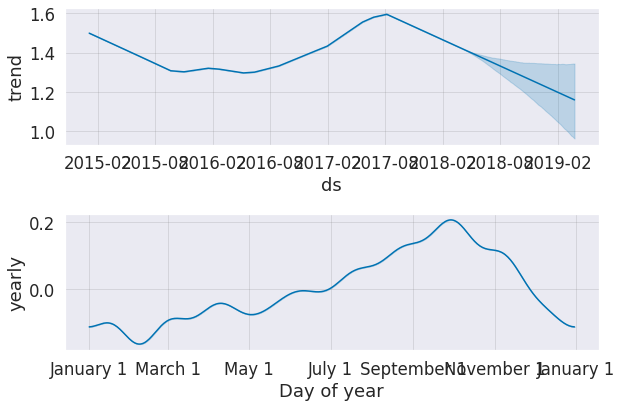

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
# Create training and testing dataset
avocado_df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Price_prediction_fbprophet/avocado.csv')

In [ ]:
# Select specific region.
avocado_df2_sample=avocado_df2[avocado_df2['region']=='West']

In [ ]:
# Sort dataset in ascending order by date.
avocado_df2_sample=avocado_df2_sample.sort_values('Date')

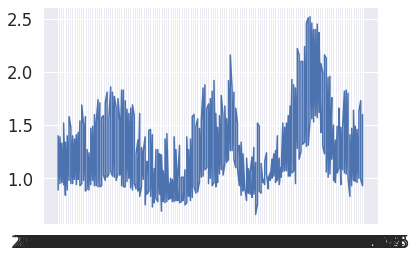

In [ ]:
# Plot the average price evolution
plt.plot(avocado_df2_sample['Date'], avocado_df2_sample['AveragePrice'])

In [ ]:
avocado_df2_sample=avocado_df2_sample.rename(columns={'Date': 'ds', 'AveragePrice':'y'})

In [ ]:
avocado_df2_sample.head()

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


In [ ]:
avocado_prophet_df2=avocado_df2_sample[['ds', 'y']]

In [ ]:
avocado_prophet_df2.head()

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96


In [ ]:
m=Prophet()
m.fit(avocado_prophet_df2)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


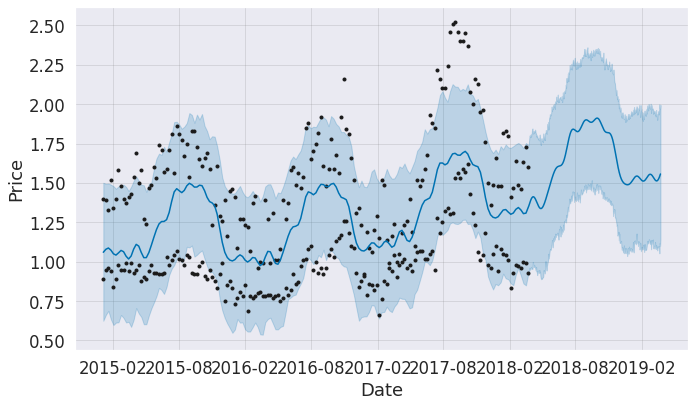

In [ ]:
figure=m.plot(forecast, xlabel='Date', ylabel='Price')

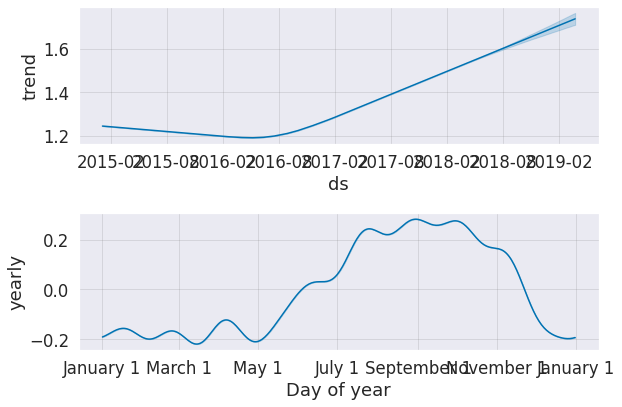

In [ ]:
figure3=m.plot_components(forecast)